<a href="https://colab.research.google.com/github/LeandroCoelhos/estudos_datascience/blob/main/shap_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold

# Carregando o conjunto de dados da Califórnia
data = fetch_california_housing()
X = data.data
y = data.target

# Inicializando o modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Configurando a métrica a ser utilizada
scoring = {'r2': 'r2', 'mse': make_scorer(mean_squared_error), 'mae': make_scorer(mean_absolute_error)}

# Realizando a validação cruzada repetida usando cross_validate
cv_results = cross_validate(rf_model, X, y, scoring=scoring, cv=RepeatedKFold(n_splits=2, n_repeats=2, random_state=42), verbose=10)

# Exibindo as médias das métricas
avg_r2 = cv_results['test_r2'].mean()
avg_mse = cv_results['test_mse'].mean()
avg_mae = cv_results['test_mae'].mean()

# Exibindo as médias das métricas
print(f'Average R2 Score: {avg_r2:.4f}')
print(f'Average Mean Squared Error (MSE): {avg_mse:.4f}')
print(f'Average Mean Absolute Error (MAE): {avg_mae:.4f}')

[CV] START .....................................................................
[CV] END  mae: (test=0.347) mse: (test=0.277) r2: (test=0.791) total time=   7.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s


[CV] END  mae: (test=0.340) mse: (test=0.268) r2: (test=0.800) total time=   5.8s
[CV] START .....................................................................
[CV] END  mae: (test=0.344) mse: (test=0.273) r2: (test=0.792) total time=   7.0s
[CV] START .....................................................................
[CV] END  mae: (test=0.344) mse: (test=0.271) r2: (test=0.799) total time=   5.9s
Average R2 Score: 0.7956
Average Mean Squared Error (MSE): 0.2721
Average Mean Absolute Error (MAE): 0.3439


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   25.9s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   25.9s


In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Carregando o conjunto de dados da Califórnia
data = fetch_california_housing()

# Criando um DataFrame do pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Adicionando a coluna alvo ao DataFrame

# Separando as variáveis independentes (X) e a variável dependente (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividindo o conjunto de dados em treino (80%) e teste (20%)
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando o modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Inicializando e ajustando o modelo RandomForestRegressor nos dados de treino
rf_model.fit(x_treino, y_treino)

# Realizando previsões nos dados de teste
y_pred = rf_model.predict(x_teste)

# Calculando as métricas nos dados de teste
r2_teste = r2_score(y_teste, y_pred)
mse_teste = mean_squared_error(y_teste, y_pred)
mae_teste = mean_absolute_error(y_teste, y_pred)

# Exibindo as métricas nos dados de teste
print(f'R2 Score (Test Set): {r2_teste:.4f}')
print(f'Mean Squared Error (MSE) - Test Set: {mse_teste:.4f}')
print(f'Mean Absolute Error (MAE) - Test Set: {mae_teste:.4f}')

R2 Score (Test Set): 0.8051
Mean Squared Error (MSE) - Test Set: 0.2554
Mean Absolute Error (MAE) - Test Set: 0.3275


In [4]:
#!pip install shap
X.shape

(20640, 8)

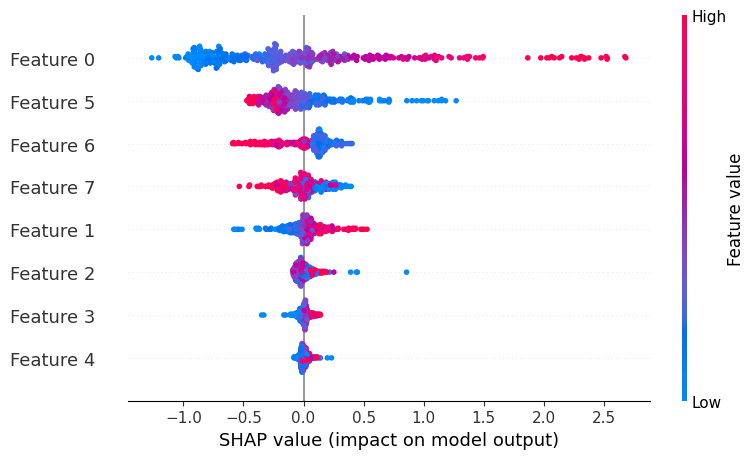

In [8]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Carregando o conjunto de dados da Califórnia
data = fetch_california_housing()
X = data.data
y = data.target

# Dividindo o conjunto de dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=400, train_size=1000, random_state=42)

# Criando o modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo apenas no conjunto de treino
modelo_rf.fit(X_treino, y_treino)

# Criando o objeto Explainer com paralelização
explainer_rf = shap.TreeExplainer(modelo_rf, feature_perturbation="interventional")

# Calculando os SHAP values usando o conjunto de teste
shap_values_rf_teste = explainer_rf.shap_values(X_teste)

# Plotando os gráficos de summary_plot ou outros plots relevantes
shap.summary_plot(shap_values_rf_teste, X_teste)

In [11]:
import pandas as pd
import numpy as np

# Suponha que você já tenha calculado os SHAP values e tenha o DataFrame original (X)
# e os SHAP values (shap_values_rf)

# Criando um DataFrame com os SHAP values e os nomes das variáveis
shap_df = pd.DataFrame(shap_values_rf_teste, columns=data.feature_names)

# Obtendo os três maiores valores absolutos para cada instância
top3_indices = np.argsort(-np.abs(shap_values_rf_teste), axis=1)[:, :3]

# Criando colunas para armazenar os nomes das variáveis correspondentes
shap_df['shap_1'] = shap_df.columns[top3_indices[:, 0]]
shap_df['shap_2'] = shap_df.columns[top3_indices[:, 1]]
shap_df['shap_3'] = shap_df.columns[top3_indices[:, 2]]

# Exibindo o DataFrame resultante com as colunas adicionadas
print(shap_df[['shap_1', 'shap_2', 'shap_3']])

        shap_1     shap_2     shap_3
0       MedInc   AveOccup  Longitude
1       MedInc  Longitude   Latitude
2     AveOccup   HouseAge     MedInc
3       MedInc   AveOccup   HouseAge
4    Longitude     MedInc   HouseAge
..         ...        ...        ...
395     MedInc   Latitude   AveOccup
396     MedInc   HouseAge   AveOccup
397     MedInc   AveOccup  Longitude
398   AveOccup   HouseAge   Latitude
399     MedInc   Latitude  Longitude

[400 rows x 3 columns]


In [13]:
import pandas as pd
import numpy as np

# Suponha que você já tenha calculado os SHAP values e tenha o DataFrame original (X)
# e os SHAP values (shap_values_rf_teste)

# Criando um DataFrame com os SHAP values e os nomes das variáveis
shap_df = pd.DataFrame(shap_values_rf_teste, columns=data.feature_names)

# Obtendo os três maiores valores absolutos para cada instância
top3_indices = np.argsort(-np.abs(shap_values_rf_teste), axis=1)[:, :3]

# Criando colunas para armazenar os nomes das variáveis correspondentes
shap_df['shap_1'] = shap_df.columns[top3_indices[:, 0]]
shap_df['shap_2'] = shap_df.columns[top3_indices[:, 1]]
shap_df['shap_3'] = shap_df.columns[top3_indices[:, 2]]

# Exibindo o DataFrame resultante com as colunas adicionadas
print(shap_df[['shap_1', 'shap_2', 'shap_3']])

        shap_1     shap_2     shap_3
0       MedInc   AveOccup  Longitude
1       MedInc  Longitude   Latitude
2     AveOccup   HouseAge     MedInc
3       MedInc   AveOccup   HouseAge
4    Longitude     MedInc   HouseAge
..         ...        ...        ...
395     MedInc   Latitude   AveOccup
396     MedInc   HouseAge   AveOccup
397     MedInc   AveOccup  Longitude
398   AveOccup   HouseAge   Latitude
399     MedInc   Latitude  Longitude

[400 rows x 3 columns]


In [14]:
from collections import Counter

# Supondo que você já tenha o DataFrame shap_df com as colunas 'shap_1', 'shap_2', 'shap_3'
top3_colunas = shap_df[['shap_1', 'shap_2', 'shap_3']]

# Concatenando todas as colunas em uma única lista
todos_valores = top3_colunas.values.flatten()

# Contando a ocorrência de cada valor
contagem_valores = Counter(todos_valores)

# Obtendo os top 3 valores mais comuns
top3_comuns = contagem_valores.most_common(3)

# Exibindo os resultados
print("Top 3 valores mais comuns:")
for valor, contagem in top3_comuns:
    print(f"{valor}: {contagem} vezes")


Top 3 valores mais comuns:
MedInc: 345 vezes
AveOccup: 272 vezes
Latitude: 254 vezes
